In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from google.colab import drive
import math
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
!pip install PyPDF2

In [207]:
#import PyPDF2
#import csv

#pdf_file = open(r'/content/drive/MyDrive/Alura ciencia de dados/Python para datascience/dados/extrato_cotas (6).pdf', 'rb')
#content = PyPDF2.PdfReader(pdf_file)
#numPages = len(content.pages)
#i = 0
#qt = 0

#with open("./result.csv", "w") as csvfile:
#    writer = csv.writer(csvfile, delimiter=';')

#    while i < numPages:
#        page = content.pages[i]
#        text = page.extract_text()
#        lines = text.splitlines()

#        for line in lines:
#            if line[0].isnumeric():
#               qt += 1
#                fields = line.split(" ")
##                writer.writerow([qt, fields[0], fields[1]])

 #       i += 1

# Usar Pandas para ler o CSV
#df = pd.read_csv("./result.csv", delimiter=';')

# Agora você pode trabalhar com o DataFrame 'df' usando Pandas
#print(df.head())  # Exemplo: exibir as primeiras linhas do DataFrame


In [208]:
# Aqui estou exportando em pdf lendo e transformando em csv para transformar em um dataframe
import PyPDF2
import csv

pdf_file = open(r'/content/drive/MyDrive/Alura ciencia de dados/Python para datascience/dados/extrato_cotas (6).pdf', 'rb')
content = PyPDF2.PdfReader(pdf_file)        # ler seu conteúdo
numPages = len(content.pages)               # obter o número de páginas
i=0                                         # criar contador para a página corrente que está sendo processada
qt=0                                        # criar contador de linhas de dados (data, valor) lidas
vlAnt=0.00                                  # cria variável para armazenar o valor anterior da cota
import csv
with open("./result.csv", "w") as csvfile:    # parâmetros do arquivo CSV a ser gerado
  writer = csv.writer(csvfile, delimiter=';') # criar arquivo CSV de saída
  while i < numPages:                    # enquanto houver página do arquivo PDF a processar
    page = content.pages[i]              # ler o conteúdo da página
    text = page.extract_text()           # obter o texto da referida página
    lines = text.splitlines()            # obter as linhas do referido texto
    for line in lines:                   # para cada linha
      if line[0].isnumeric():            # se o primeiro caracter da linha for um número então é uma linha com dados
        qt+=1                            # incrementa o contador de linhas de dados
        fields = line.split(" ")         # obter o campos da linha (campos estão separado por "espaço")
        if vlAnt == 0: var = 0.00        # se o valor anterior igual a ZERO (não é possível dividir por ZERO) assume-se que a variação é ZERO
        # senão, calcula-se a variação
        else: var = float(fields[1].replace(',','.')) / vlAnt -1
        # armazenar o valor atual em valor anterior para a próxima iteração
        vlAnt=float(fields[1].replace(',','.'))
        # escrever o número da linha corrente, data e valor da cota no arquivo CSV de saída
        writer.writerow([qt,fields[0],fields[1],str(var).replace('.',',')])
    i+=1                                 # incrementar o contador da página corrente
 # Usar Pandas para ler o CSV
df = pd.read_csv("./result.csv", delimiter=';')

In [209]:


df

,1,30/01/2009,"1,0000","0,0"
0,2,06/02/2009,"1,0000","0,0"
1,3,09/02/2009,"1,0000","0,0"
2,4,10/02/2009,"1,0000","0,0"
3,5,11/02/2009,"1,0000","0,0"
4,6,12/02/2009,"1,0000","0,0"
...,...,...,...,...
3739,3741,02/01/2024,"3,6134","0,005649717514124131"
3740,3742,03/01/2024,"3,5968","-0,0045940111806055395"
3741,3743,04/01/2024,"3,5857","-0,0030860765124555156"
3742,3744,05/01/2024,"3,5911","0,0015059820955460879"


In [210]:
df.shape

(3744, 4)

In [211]:
df.columns = ['indice','Data','Cota','Variacao_0']

In [212]:
#link = '/content/drive/MyDrive/Colab Notebooks/extrato_cotas (6).xlsx'


In [213]:

# Substitua 'seuarquivo.xlsx' pelo caminho do seu arquivo Excel
# Leia todas as planilhas do Excel em um dicionário de DataFrames
#dfs = pd.read_excel(link, sheet_name=None)

# Concatene os DataFrames do dicionário em um único DataFrame
#df = pd.concat(dfs.values(), ignore_index=True)

# Agora, 'df' contém todas as planilhas do Excel concatenadas em um único DataFrame


In [214]:
df.head()

,indice,Data,Cota,Variacao_0
0,2,06/02/2009,"1,0000","0,0"
1,3,09/02/2009,"1,0000","0,0"
2,4,10/02/2009,"1,0000","0,0"
3,5,11/02/2009,"1,0000","0,0"
4,6,12/02/2009,"1,0000","0,0"


In [215]:
#renomeando coluna cota
#df.rename(columns={'Valor\nCota': 'Cota'}, inplace=True)
#df.rename(columns={'Variação\nDia': 'Variacao'}, inplace=True)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   indice      3744 non-null   int64 
 1   Data        3744 non-null   object
 2   Cota        3744 non-null   object
 3   Variacao_0  3744 non-null   object
dtypes: int64(1), object(3)
memory usage: 117.1+ KB


vendo linhas que tem caracteres

In [217]:
#df['contem_caracteres'] = df.Cota.apply(lambda x: any(c.isalpha() for c in str(x)))

# Agora, df['contem_caracteres'] conterá True se a coluna 'sua_coluna' tiver caracteres e False caso contrário

# Se você quiser filtrar os valores que contêm caracteres, você pode fazer algo assim:
#df_com_caracteres = df[df['contem_caracteres']]
#df_com_caracteres.head(5)

Excluindo colunas desnessessaria

In [218]:
df.drop('indice', axis=1,inplace = True)
#df.drop('Variação\nAcumulada', axis=1,inplace = True)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Data        3744 non-null   object
 1   Cota        3744 non-null   object
 2   Variacao_0  3744 non-null   object
dtypes: object(3)
memory usage: 87.9+ KB


Excluindo linhas que contem caracteres

In [220]:
# Obtém os índices das linhas que contêm caracteres
#indices_com_caracteres = df[df['contem_caracteres']].index

# Remove as linhas do DataFrame original usando drop
#df.drop(indices_com_caracteres, inplace=True)

Verificando se os dados foram excluídos

In [221]:
#df['contem_caracteres'] = df.Cota.apply(lambda x: any(c.isalpha() for c in str(x)))

# Agora, df['contem_caracteres'] conterá True se a coluna 'sua_coluna' tiver caracteres e False caso contrário

# Se você quiser filtrar os valores que contêm caracteres, você pode fazer algo assim:
#df_com_caracteres = df[df['contem_caracteres']]
#df_com_caracteres

In [222]:
# transformando o tipo coluna cota para float
df['Cota'] = df['Cota'].replace(',', '.', regex=True).astype(float)

In [223]:
# colando quatro digito depois da virgula
df['Cota'] = df['Cota'].round(4)

In [224]:
#df.drop('contem_caracteres', axis=1,inplace = True)

In [225]:
# Converte a coluna para o tipo datetime
df.Data = pd.to_datetime(df.Data, format='%d/%m/%Y',errors='coerce')

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        3744 non-null   datetime64[ns]
 1   Cota        3744 non-null   float64       
 2   Variacao_0  3744 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 87.9+ KB


In [227]:
df

,Data,Cota,Variacao_0
0,2009-02-06,1.0000,"0,0"
1,2009-02-09,1.0000,"0,0"
2,2009-02-10,1.0000,"0,0"
3,2009-02-11,1.0000,"0,0"
4,2009-02-12,1.0000,"0,0"
...,...,...,...
3739,2024-01-02,3.6134,"0,005649717514124131"
3740,2024-01-03,3.5968,"-0,0045940111806055395"
3741,2024-01-04,3.5857,"-0,0030860765124555156"
3742,2024-01-05,3.5911,"0,0015059820955460879"


In [228]:
# exlcuindo dados de 2024

# df = df[df['Data'].dt.year != 2024]
data_2024 = df.query('Data.dt.year == 2024')
df = df.query('Data.dt.year != 2024')


In [229]:
df.head()

,Data,Cota,Variacao_0
0,2009-02-06,1.0,"0,0"
1,2009-02-09,1.0,"0,0"
2,2009-02-10,1.0,"0,0"
3,2009-02-11,1.0,"0,0"
4,2009-02-12,1.0,"0,0"


In [230]:
# df.query('Data.dt.year == 2023')

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3739 entries, 0 to 3738
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        3739 non-null   datetime64[ns]
 1   Cota        3739 non-null   float64       
 2   Variacao_0  3739 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 116.8+ KB


Mostrando
count - 	quantidade        
mean - 	Média      
std - 	desvio padrão     
min - 	Menor valor              
25% - 	25% do valor menor    
50% - 	                   
75% - 	do valor maior             
max - 	 maior valor            

In [232]:
df.describe()

,Cota
count,3739.000000
mean,2.266514
std,0.850902
min,0.995400
25%,1.521750
50%,2.116300
75%,3.186250
max,3.644900


Aqui estou  mostrando a quantidade de cotas

In [233]:
df.Cota.value_counts()

1.0000    46
1.5856     4
1.6111     4
1.4994     4
1.0819     4
          ..
1.7590     1
1.7591     1
1.7606     1
1.7612     1
3.5931     1
Name: Cota, Length: 3303, dtype: int64

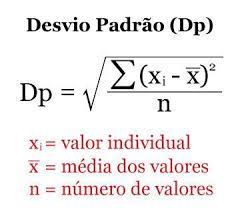

In [234]:
df = df.copy()
Variacao = ((df['Cota'] / df['Cota'].shift(1)) - 1) * 100


In [235]:
Variacao[-12:-10]

3727    0.314317
3728    0.390972
Name: Cota, dtype: float64

In [236]:
# criando coluna variaveis
#teste = df['Cota'] / df['Cota'].shift(-1) -1

df['Variacao'] = Variacao

In [237]:
df

,Data,Cota,Variacao_0,Variacao
0,2009-02-06,1.0000,"0,0",NaN
1,2009-02-09,1.0000,"0,0",0.000000
2,2009-02-10,1.0000,"0,0",0.000000
3,2009-02-11,1.0000,"0,0",0.000000
4,2009-02-12,1.0000,"0,0",0.000000
...,...,...,...,...
3734,2023-12-22,3.5882,"-0,00013932621840773152",-0.013933
3735,2023-12-26,3.5878,"-0,00011147650632625794",-0.011148
3736,2023-12-27,3.5917,"0,001087017113551525",0.108702
3737,2023-12-28,3.6006,"0,0024779352395802867",0.247794


In [238]:
# Substituir NaN por 0 na coluna 'Variacao'
df['Variacao'].fillna(0, inplace=True)


In [239]:
df.head()

,Data,Cota,Variacao_0,Variacao
0,2009-02-06,1.0,"0,0",0.0
1,2009-02-09,1.0,"0,0",0.0
2,2009-02-10,1.0,"0,0",0.0
3,2009-02-11,1.0,"0,0",0.0
4,2009-02-12,1.0,"0,0",0.0


Grafico mostrando a quantidade de Cotas em um gráfico histograma.

<Axes: ylabel='Frequency'>

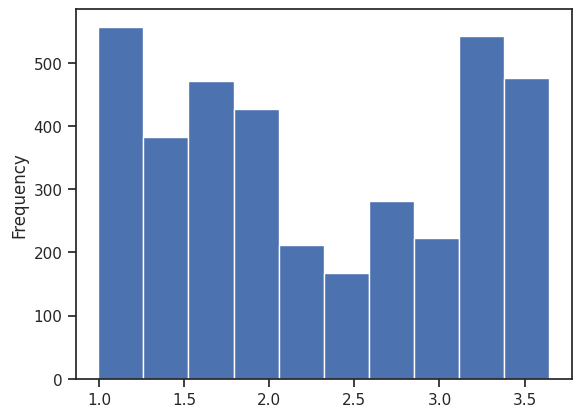

In [240]:
df.Cota.plot(kind='hist')

[imagem](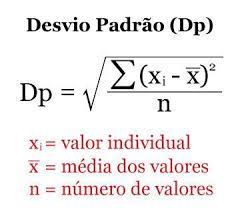)

_OUTLIER

Valor atípico ou ponto fora da curva

% Dado que difere do padrão do conjunto de dados
significativame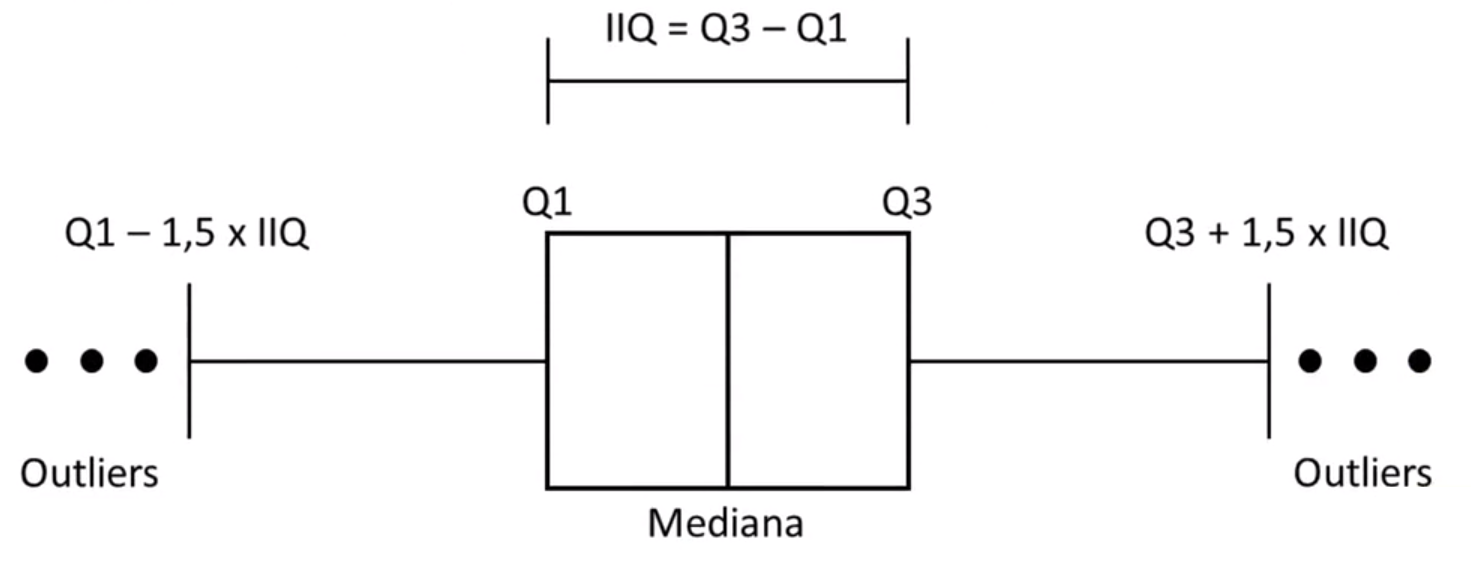

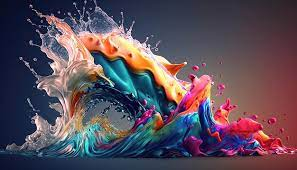

<Axes: xlabel='Variacao'>

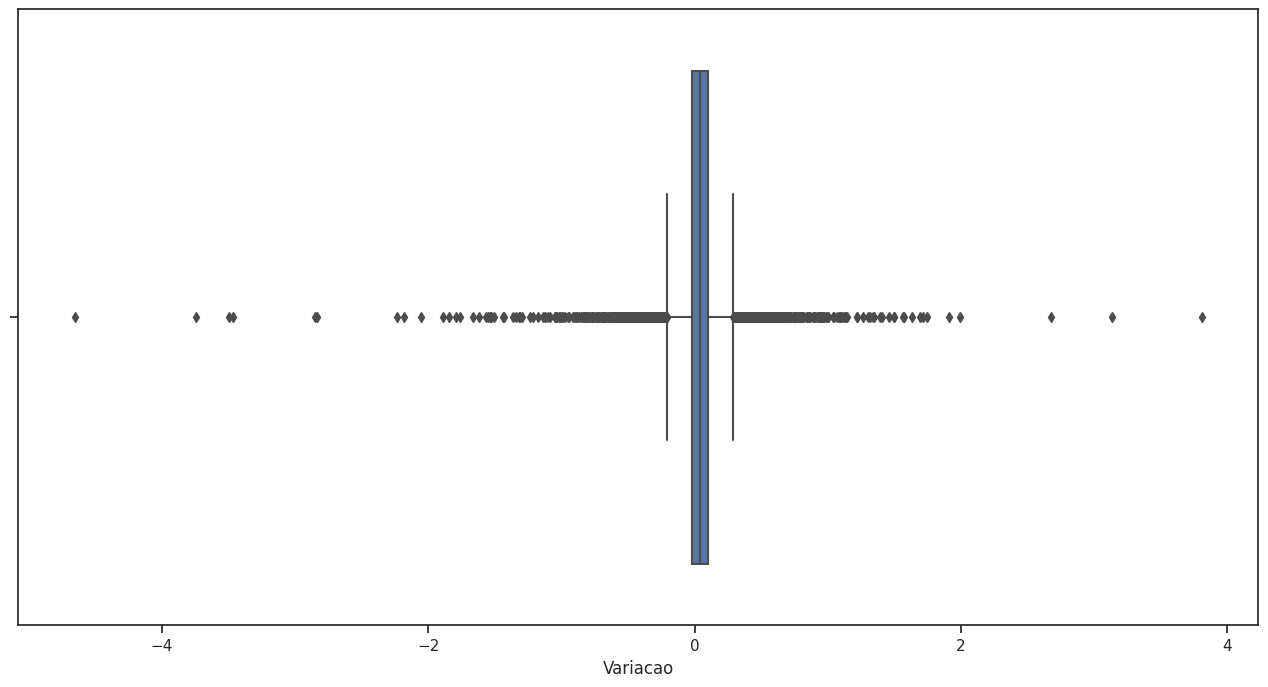

In [241]:

plt.figure(figsize=(16,8))
sns.boxplot(x=df.Variacao)

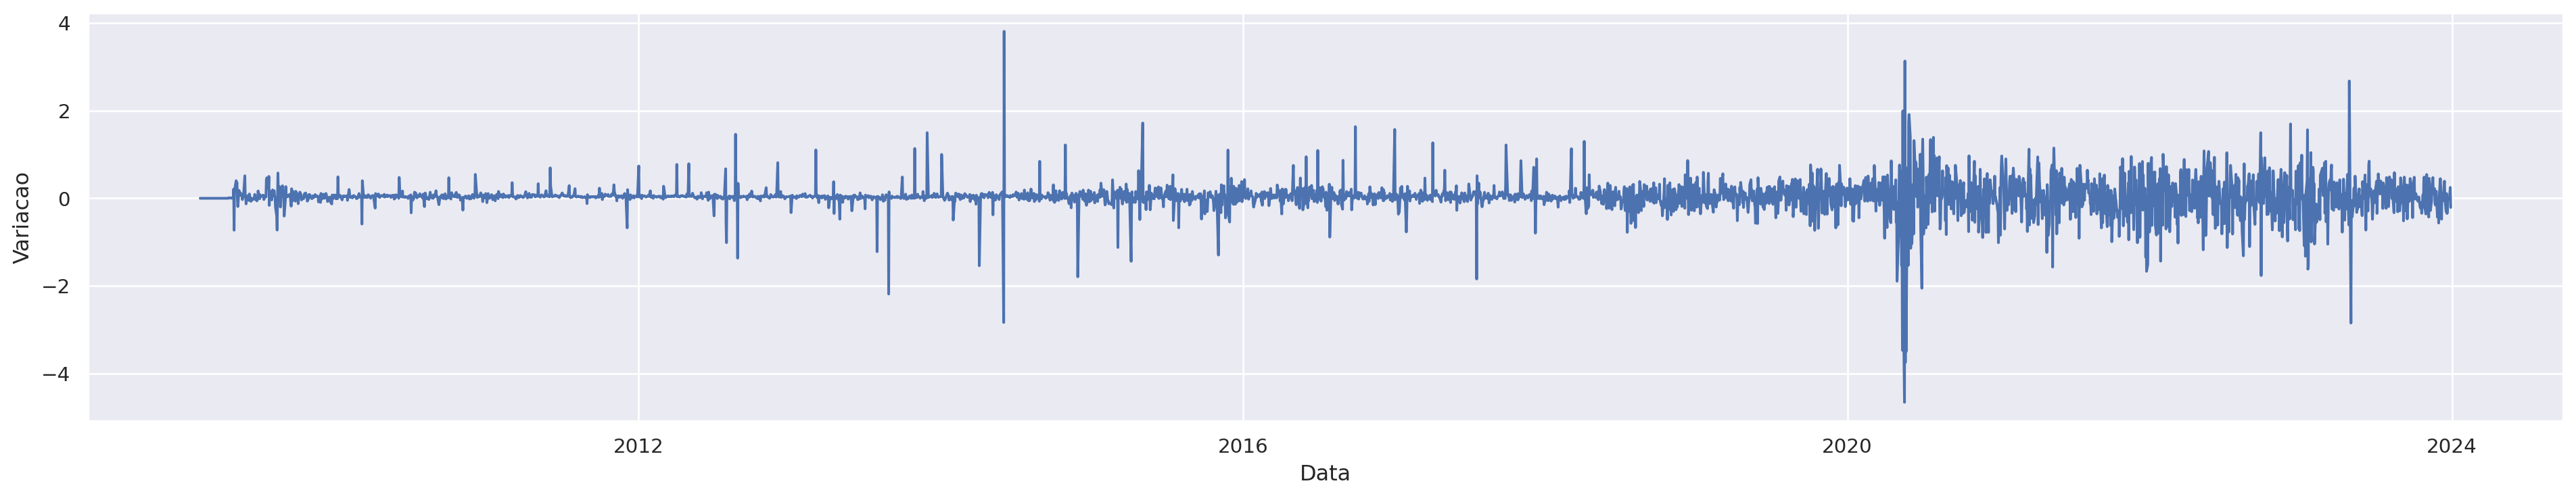

In [242]:
so.Plot(df, y="Variacao", x="Data").add(so.Line(), orient="x").layout(size=(20, 4))

In [243]:
# Calcular a variância da coluna

# calcular média
media_simples = df.Cota.mean()

# Calcular diferenças ao quadrado
diferencas_quadradas = (df.Cota - media_simples) **2

# soma total das diferenças ao quadrado
soma_diferencas_quadradas = diferencas_quadradas.sum()

# Calcular a variância (amostral)
variancia_amostral = soma_diferencas_quadradas / (len(df['Cota']) - 1)


# Calcular o desvio padrão
desvio_padrao = math.sqrt(variancia_amostral)


print(f'desvio padrão manual: {desvio_padrao} pandas: {df.Cota.std()}')
print(f'variancia: {variancia_amostral} pandas: {df.Cota.var()}')

desvio padrão manual: 0.850902411055383 pandas: 0.850902411055383
variancia: 0.724034913139864 pandas: 0.724034913139864


In [244]:
diferencas_quadradas

0       1.604057
1       1.604057
2       1.604057
3       1.604057
4       1.604057
          ...   
3734    1.746854
3735    1.745797
3736    1.756118
3737    1.779786
3738    1.759831
Name: Cota, Length: 3739, dtype: float64

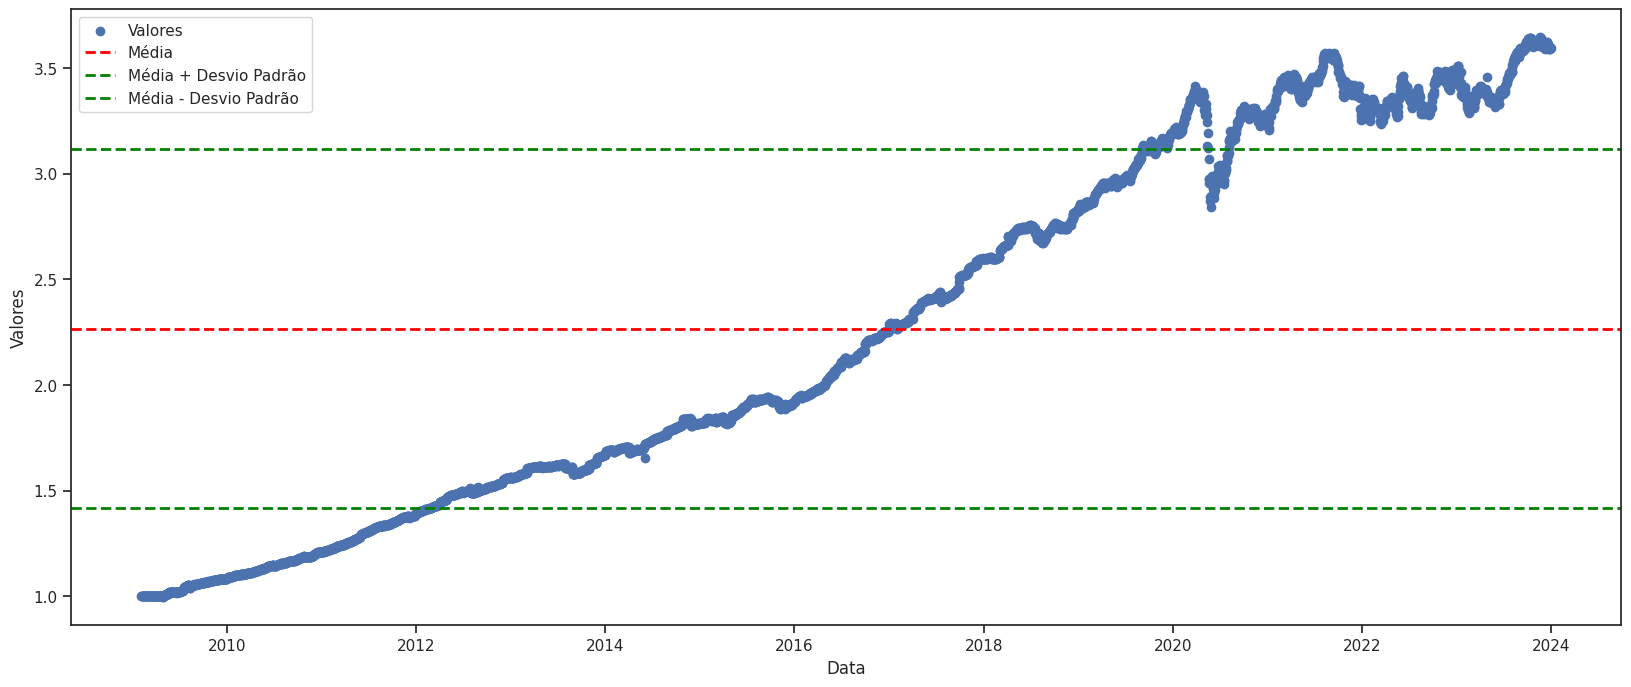

In [245]:
import pandas as pd
import matplotlib.pyplot as plt



plt.figure(figsize=(20,8))
# Plotar um gráfico de dispersão
plt.scatter(x =df['Data'], y=df.Cota, label='Valores')

# Adicionar linhas para a média, média + desvio padrão e média - desvio padrão
plt.axhline(media_simples, color='red', linestyle='dashed', linewidth=2, label='Média')
plt.axhline(media_simples + desvio_padrao, color='green', linestyle='dashed', linewidth=2, label='Média + Desvio Padrão')
plt.axhline(media_simples - desvio_padrao, color='green', linestyle='dashed', linewidth=2, label='Média - Desvio Padrão')

# Configurações do gráfico
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.show()


In [246]:
df['diferencas_quadradas'] = diferencas_quadradas
df

,Data,Cota,Variacao_0,Variacao,diferencas_quadradas
0,2009-02-06,1.0000,"0,0",0.000000,1.604057
1,2009-02-09,1.0000,"0,0",0.000000,1.604057
2,2009-02-10,1.0000,"0,0",0.000000,1.604057
3,2009-02-11,1.0000,"0,0",0.000000,1.604057
4,2009-02-12,1.0000,"0,0",0.000000,1.604057
...,...,...,...,...,...
3734,2023-12-22,3.5882,"-0,00013932621840773152",-0.013933,1.746854
3735,2023-12-26,3.5878,"-0,00011147650632625794",-0.011148,1.745797
3736,2023-12-27,3.5917,"0,001087017113551525",0.108702,1.756118
3737,2023-12-28,3.6006,"0,0024779352395802867",0.247794,1.779786


In [247]:
df.diferencas_quadradas.max()

1.8999482201024827

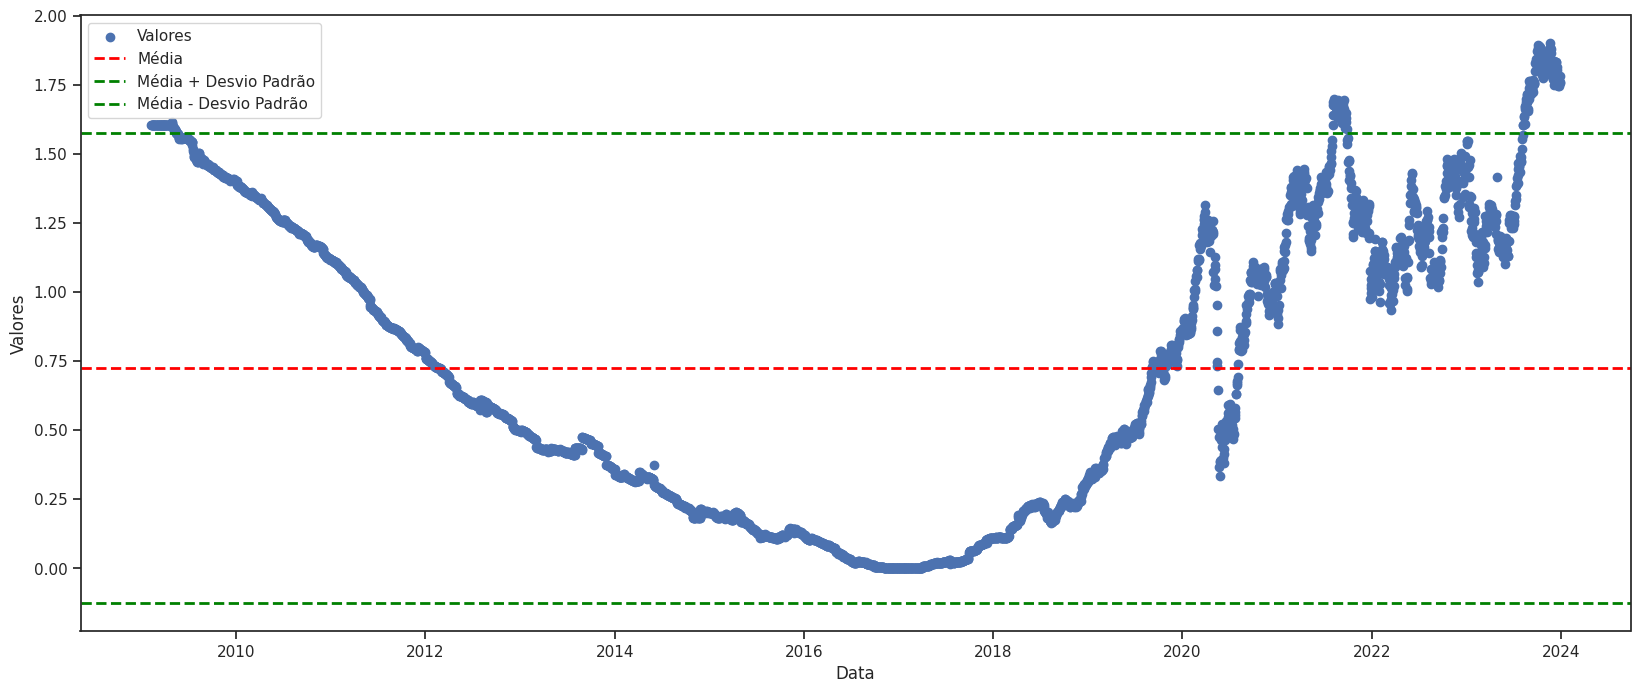

In [248]:
import pandas as pd
import matplotlib.pyplot as plt



plt.figure(figsize=(20,8))
# Plotar um gráfico de dispersão
plt.scatter(x =df['Data'], y=df.diferencas_quadradas, label='Valores')

# Adicionar linhas para a média, média + desvio padrão e média - desvio padrão
plt.axhline(diferencas_quadradas.mean(), color='red', linestyle='dashed', linewidth=2, label='Média')
plt.axhline(diferencas_quadradas.mean() + desvio_padrao, color='green', linestyle='dashed', linewidth=2, label='Média + Desvio Padrão')
plt.axhline(diferencas_quadradas.mean() - desvio_padrao, color='green', linestyle='dashed', linewidth=2, label='Média - Desvio Padrão')

# Configurações do gráfico
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.show()


# esses dados pode ta fora porque o desvio padrão pode ta viciado por esta com grandes ocilações muitos dados outliers

In [249]:
# Calcular o coeficiente de variação para saber da qualidade
coef_variacao_coluna = (desvio_padrao / media_simples) * 100

print(f"Coeficiente de Variação: {coef_variacao_coluna:.2f}%")

Coeficiente de Variação: 37.54%


<Axes: >

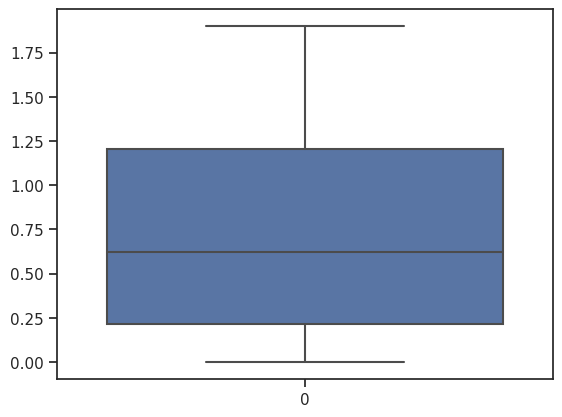

In [250]:
sns.boxplot(df.diferencas_quadradas)
#sns.boxplot(x=df.Variacao)

In [251]:
# selecionando o primeiro quartill
q1 = df.Variacao.quantile(.25)
q3 = df.Variacao.quantile(.75)
IQR = q3 - q1
limite_inferior = q1 - 3 * IQR
limite_superior = q3 + 3 * IQR

outliers_index = (df.Variacao < limite_inferior) | (df.Variacao > limite_superior)
outliers_index

0       False
1       False
2       False
3       False
4       False
        ...  
3734    False
3735    False
3736    False
3737    False
3738    False
Name: Variacao, Length: 3739, dtype: bool

Ao criar a máscara booleana outliers_index e usá-la para filtrar o DataFrame, mostrou que não há valores fora dos limites estabelecidos, pois a saída da série resultante está vazia. Isso significa que não há outliers com base no critério.

Essa abordagem é comum para identificar outliers usando a regra do IQR com uma multiplicação, e parece que sua análise está correta.

In [252]:
df[outliers_index]['Cota']

54      0.9954
71      1.0190
112     1.0459
125     1.0482
126     1.0406
         ...  
3701    3.6079
3715    3.6217
3718    3.5970
3722    3.6066
3723    3.5894
Name: Cota, Length: 425, dtype: float64

In [332]:
# excluindo outliers

sem_outliers = df.loc[~outliers_index, 'Variacao']

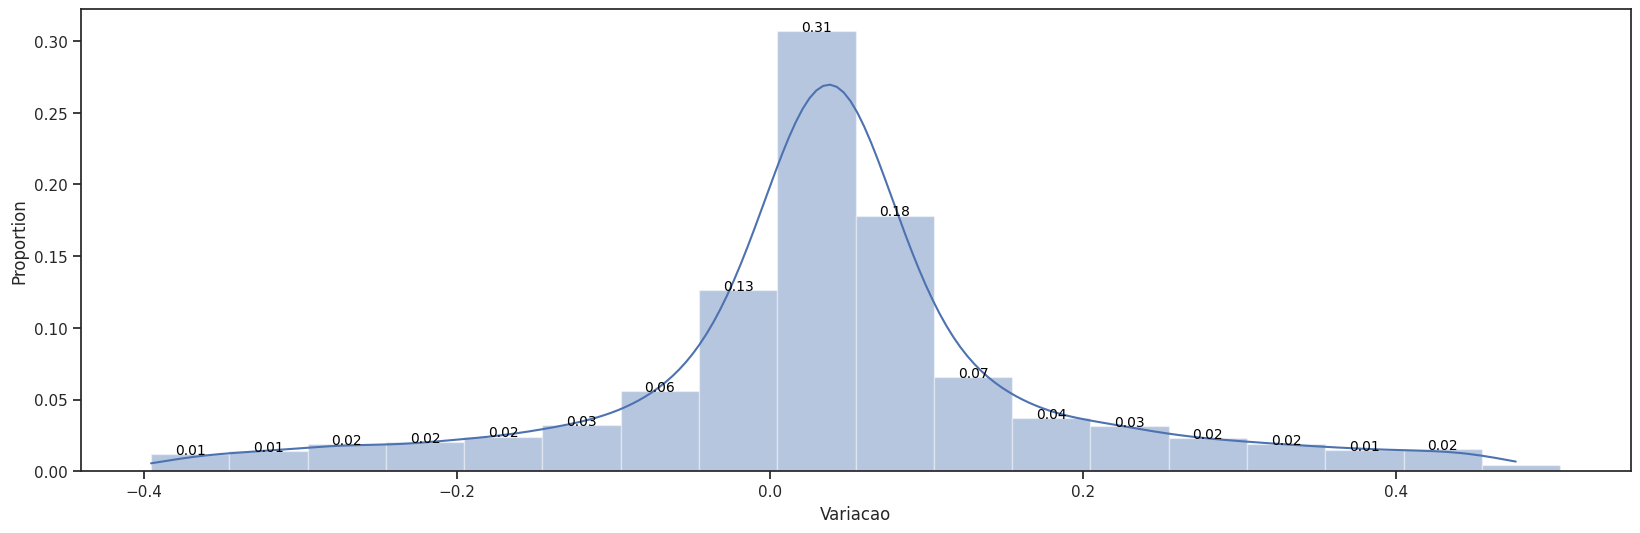

In [351]:


plt.figure(figsize=(20, 6))
ax = sns.histplot(
    sem_outliers, kde=True,
    stat="proportion",
    #kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
    #linewidth=2,
    binwidth=0.05
)

# Ajuste linewidth conforme necessário
# binwidth controla a largura da barra no histograma

# Adicionar os valores acima das barras
for p in ax.patches:
    if p.get_height() > 0.01:  # Verifica se a altura da barra é maior que zero
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black')



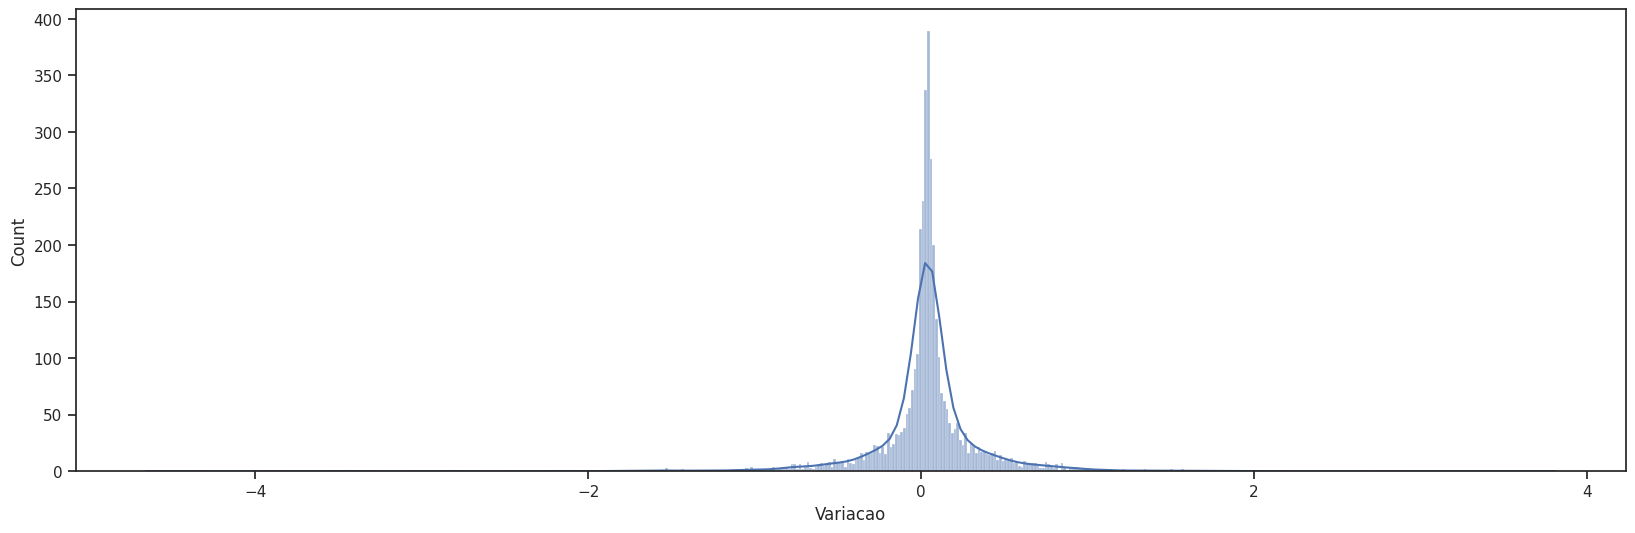

In [352]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sns.histplot(x=df['Variacao'], kde=True)  # Use histplot para histograma
plt.show()


In [254]:
df.query("Variacao>3.5")

,Data,Cota,Variacao_0,Variacao,diferencas_quadradas
1334,2014-06-03,1.7193,"0,03809926337398872",3.809926,0.299443


In [255]:
outliers_index.shape

(3739,)

<Axes: xlabel='Data', ylabel='Variacao'>

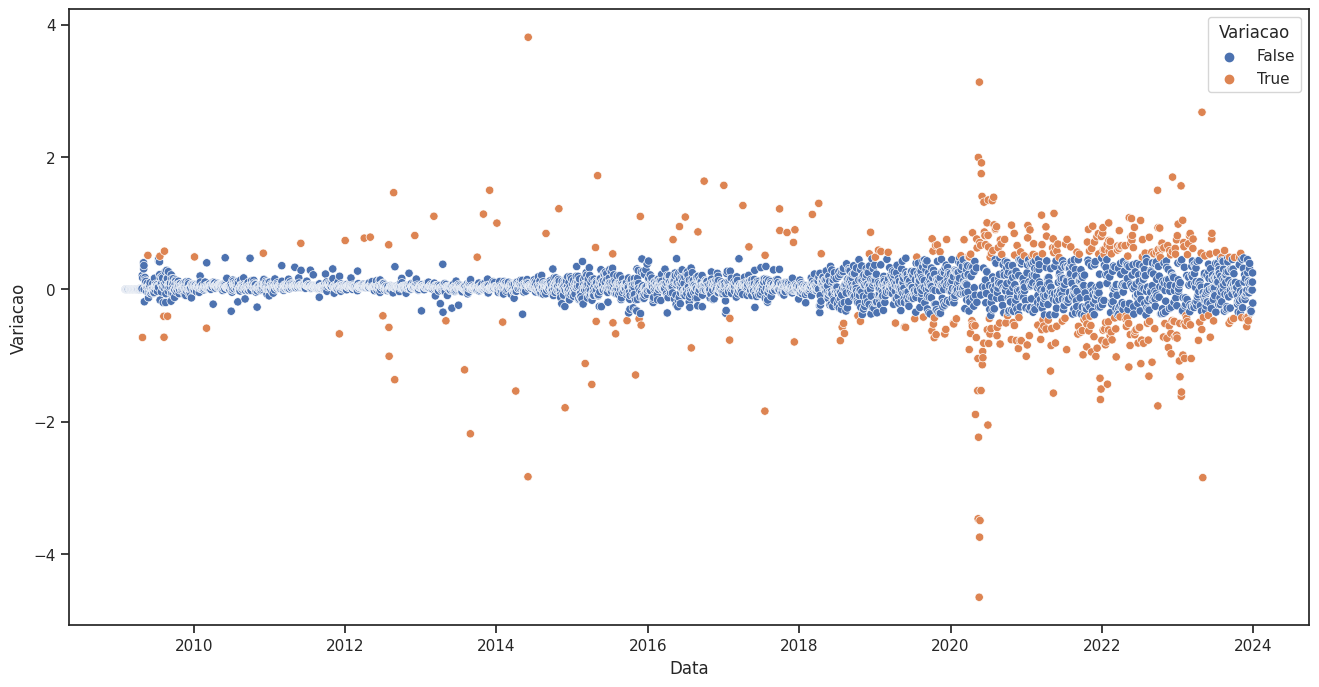

In [256]:
#sns.boxplot(x=diferencas_quadradas,y=df.Variacao)
plt.figure(figsize=(16,8))

sns.scatterplot(x=df.Data, y=df['Variacao'], hue=outliers_index, legend='full')



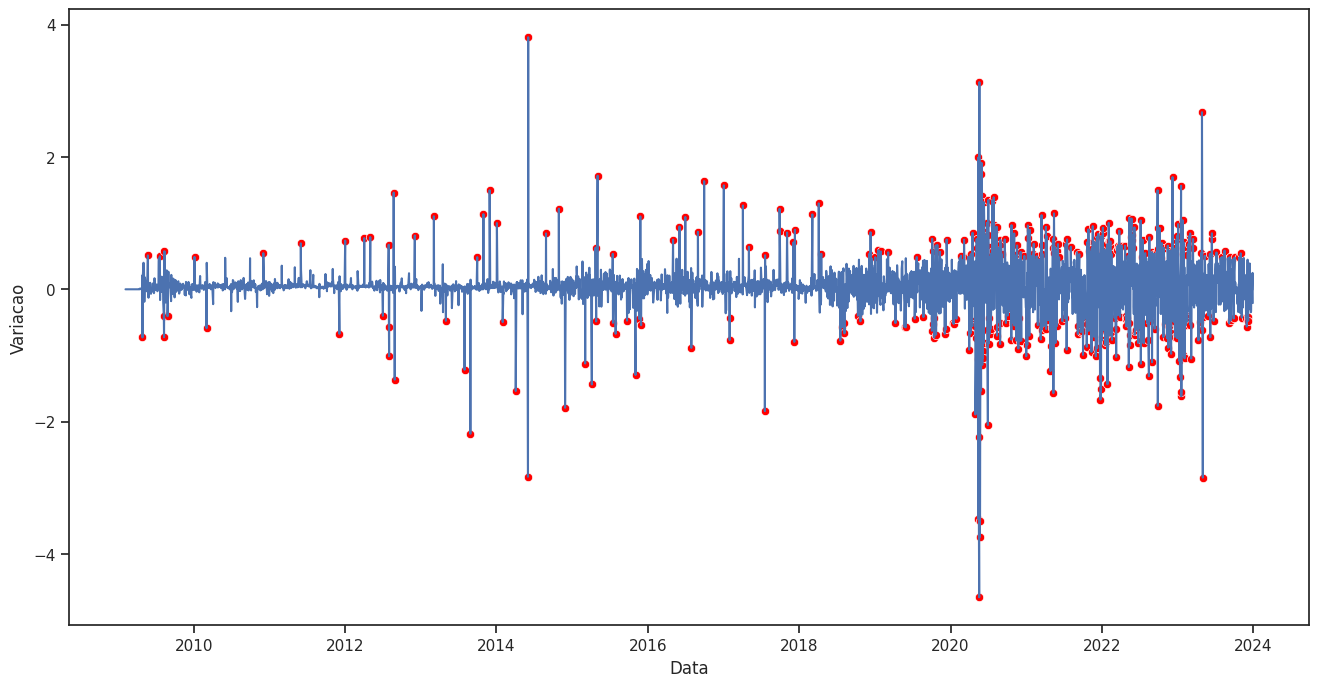

In [257]:
# Exibir gráfico utilizando Seaborn
plt.figure(figsize=(16,8))
sns.lineplot(x=df['Data'], y=df['Variacao'])
sns.scatterplot(x=df.loc[outliers_index, 'Data'], y=df.loc[outliers_index, 'Variacao'], marker='o', color='red')
plt.show()

In [258]:
# criando coluna ano
df['ano'] = df['Data'].dt.year

In [259]:
# media por ano
df.groupby('ano')['Cota'].agg('mean')


ano
2009    1.037440
2010    1.145519
2011    1.300512
2012    1.480059
2013    1.607335
2014    1.746911
2015    1.882572
2016    2.087555
2017    2.414408
2018    2.706724
2019    3.007913
2020    3.208011
2021    3.427908
2022    3.359303
2023    3.472722
Name: Cota, dtype: float64

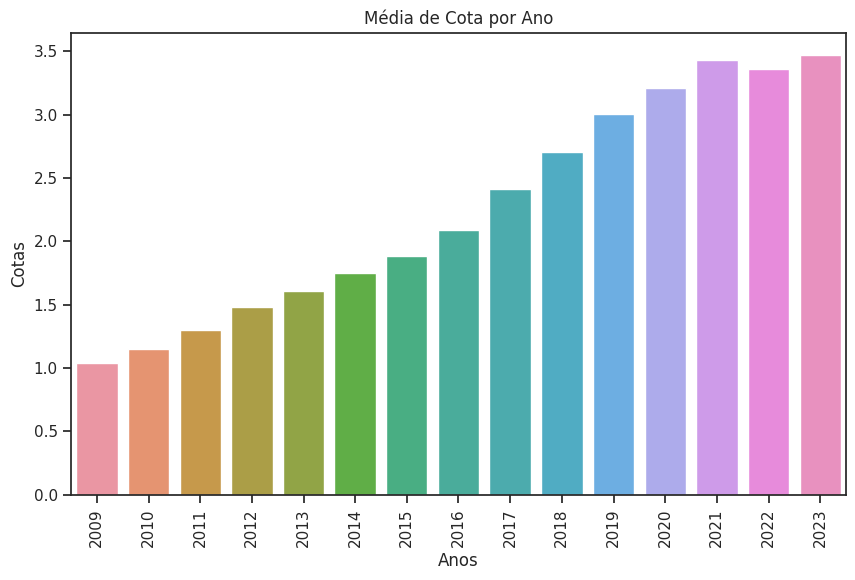

In [260]:




# Agrupar e calcular a média, mediana e soma dos valores
grup_ano_cota = df.groupby('ano')['Cota'].agg(['mean', 'median', 'sum'])

# Exibir o resultado


plt.figure(figsize=(10,6))

sns.barplot(x=grup_ano_cota.index.tolist(), y=grup_ano_cota['mean'].values)

# Definir os rótulos do eixo x

plt.xticks(rotation=90)
plt.title('Média de Cota por Ano')
plt.xlabel('Anos')
plt.ylabel('Cotas')

plt.show()

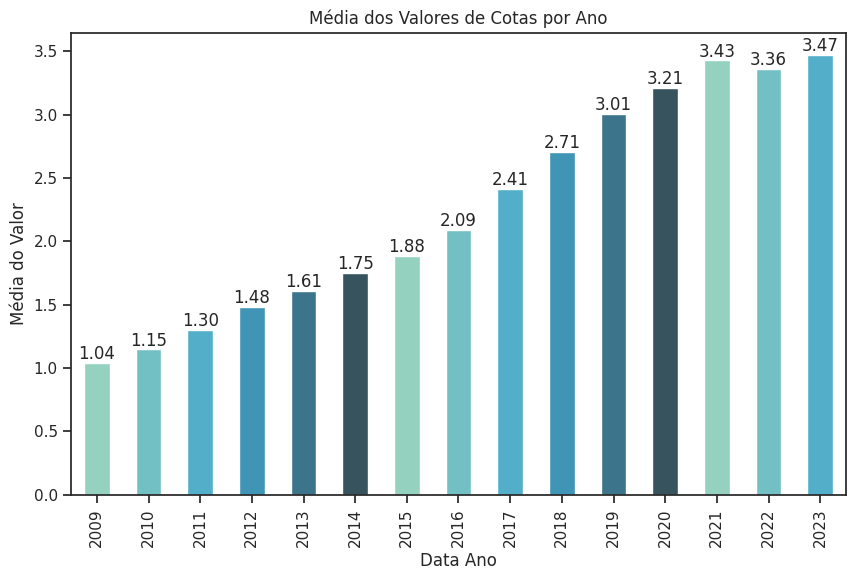

In [261]:
# Criar um gráfico de barras para a média
fig, ax1 = plt.subplots(figsize=(10, 6))
grup_ano_cota['mean'].plot(kind='bar', ax=ax1, color=sns.color_palette('GnBu_d'))
ax1.set_xlabel('Data Ano')
ax1.set_ylabel('Média do Valor')
ax1.set_title('Média dos Valores de Cotas por Ano')

# Adicionar os valores em cima das barras
for i, valor in enumerate(grup_ano_cota['mean']):
    ax1.annotate(f'{valor:.2f}', (i, valor), ha='center', va='bottom')

# Exibir os gráficos
plt.show()


Text(0, 0.5, 'Cotas')

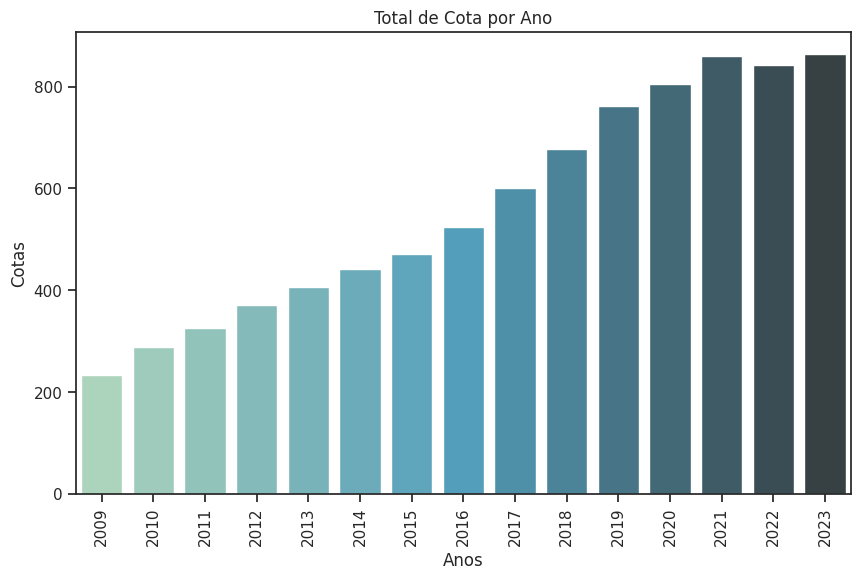

In [262]:
import matplotlib.pyplot as plt


# Exibir o resultado
plt.figure(figsize=(10,6))

sns.barplot(x=grup_ano_cota.index.tolist(), y=grup_ano_cota['sum'].values,palette = 'GnBu_d')

# Definir os rótulos do eixo x

plt.xticks(rotation=90)
plt.title('Total de Cota por Ano')
plt.xlabel('Anos')
plt.ylabel('Cotas')


Text(0, 0.5, 'Cotas')

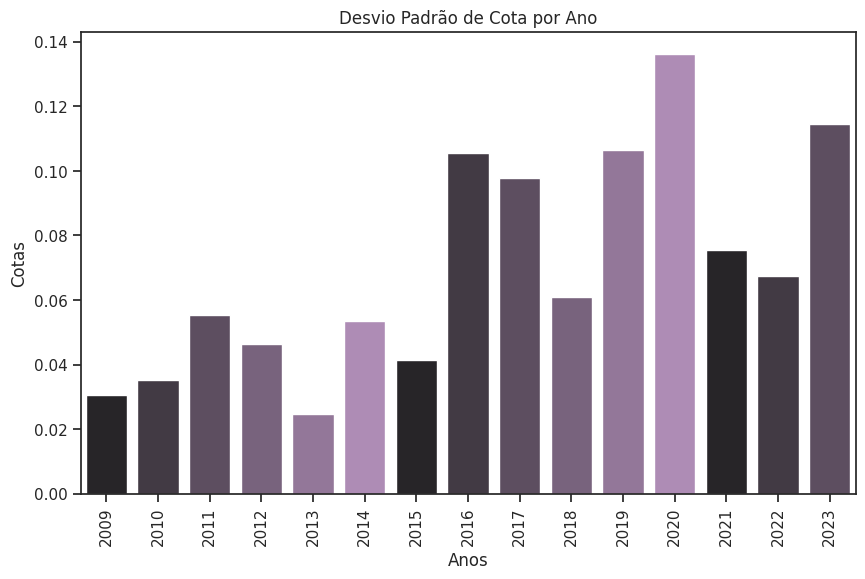

In [263]:
import matplotlib.pyplot as plt


# Agrupar  e calcular desvio padrão
grup_ano_cota_desvio_padrao = df.groupby('ano')['Cota'].agg('std')

# Exibir o resultado

plt.figure(figsize=(10,6))

sns.barplot(x=grup_ano_cota_desvio_padrao.index.tolist(), y=grup_ano_cota_desvio_padrao.values,palette=sns.dark_palette("#b285bc"))

# Definir os rótulos do eixo x

plt.xticks(rotation=90)
plt.title('Desvio Padrão de Cota por Ano')
plt.xlabel('Anos')
plt.ylabel('Cotas')


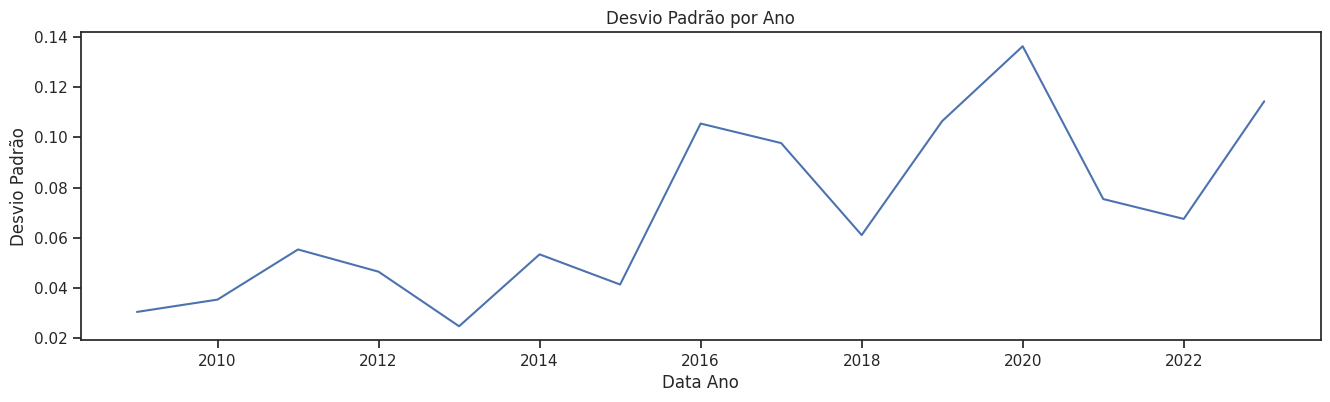

In [264]:
#criando grafico de linha
fig, ax = plt.subplots(figsize=(16, 4))

x = grup_ano_cota_desvio_padrao.index.tolist()
y = grup_ano_cota_desvio_padrao.values
#passandos os dados
ax.plot(x,y)

#personalizando o grafico adicionando rotulos para eixo x e para eixo y e titulo
ax.set_xlabel("Data Ano")
ax.set_ylabel("Desvio Padrão")
ax.set_title("Desvio Padrão por Ano")


plt.show()

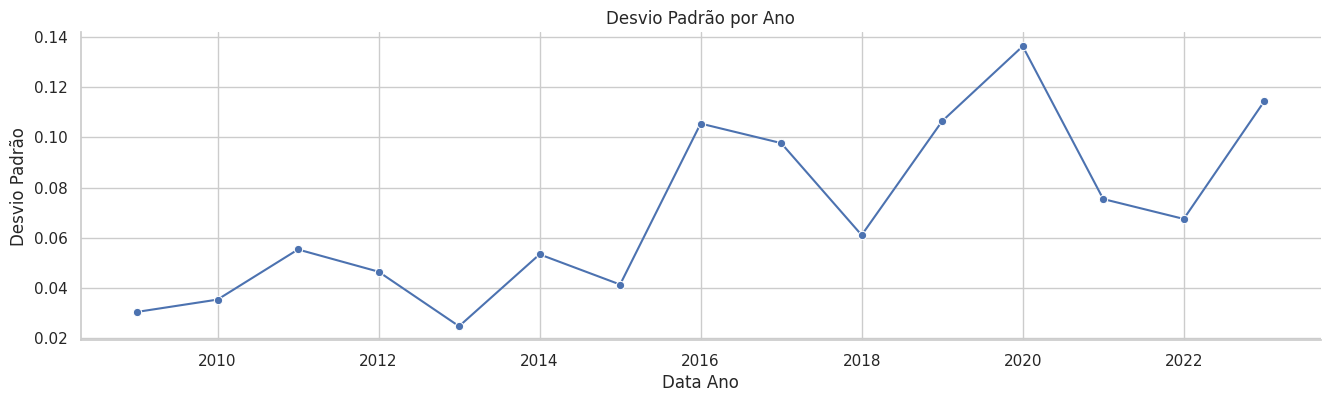

In [265]:

# Supondo que você já tenha os dados x e y definidos
x = grup_ano_cota_desvio_padrao.index.tolist()
y = grup_ano_cota_desvio_padrao.values

# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Criando o gráfico de linha usando Seaborn
fig, ax = plt.subplots(figsize=(16, 4))
sns.lineplot(x=x, y=y, marker='o', color='b', ax=ax)

# Personalizando o gráfico
ax.set_xlabel("Data Ano")
ax.set_ylabel("Desvio Padrão")
ax.set_title("Desvio Padrão por Ano")

# Adicionando grade ao fundo do gráfico
sns.despine()

plt.show()


In [266]:
dados_desvio_padrao = grup_ano_cota_desvio_padrao.to_frame().reset_index()
dados_desvio_padrao

,ano,Cota
0,2009,0.030442
1,2010,0.035353
2,2011,0.055329
3,2012,0.046473
4,2013,0.024732
5,2014,0.053384
6,2015,0.041357
7,2016,0.105496
8,2017,0.097721
9,2018,0.061055


Text(0.5, 1.0, 'Desvio Padrão')

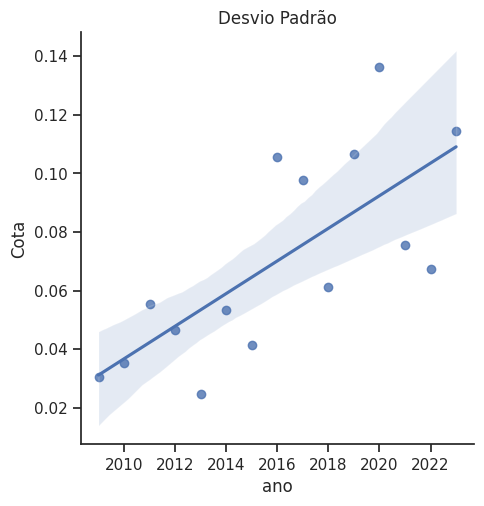

In [267]:

sns.set(style="ticks")

sns.lmplot(data=dados_desvio_padrao, x="ano", y="Cota")
plt.title('Desvio Padrão')

<Axes: xlabel='ano', ylabel='Cota'>

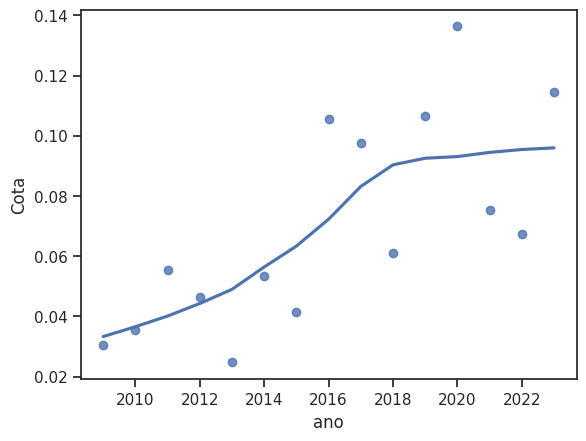

In [268]:
sns.regplot(data=dados_desvio_padrao, x="ano", y="Cota",lowess=True)

In [269]:
df

,Data,Cota,Variacao_0,Variacao,diferencas_quadradas,ano
0,2009-02-06,1.0000,"0,0",0.000000,1.604057,2009
1,2009-02-09,1.0000,"0,0",0.000000,1.604057,2009
2,2009-02-10,1.0000,"0,0",0.000000,1.604057,2009
3,2009-02-11,1.0000,"0,0",0.000000,1.604057,2009
4,2009-02-12,1.0000,"0,0",0.000000,1.604057,2009
...,...,...,...,...,...,...
3734,2023-12-22,3.5882,"-0,00013932621840773152",-0.013933,1.746854,2023
3735,2023-12-26,3.5878,"-0,00011147650632625794",-0.011148,1.745797,2023
3736,2023-12-27,3.5917,"0,001087017113551525",0.108702,1.756118,2023
3737,2023-12-28,3.6006,"0,0024779352395802867",0.247794,1.779786,2023


<ipython-input-270-0594b0de2309>:2: UserWarning: 
The palette list has fewer values (6) than needed (15) and will cycle, which may produce an uninterpretable plot.
  ax = sns.histplot(df, x="Cota", hue="ano",palette = sns.light_palette("#79C"))


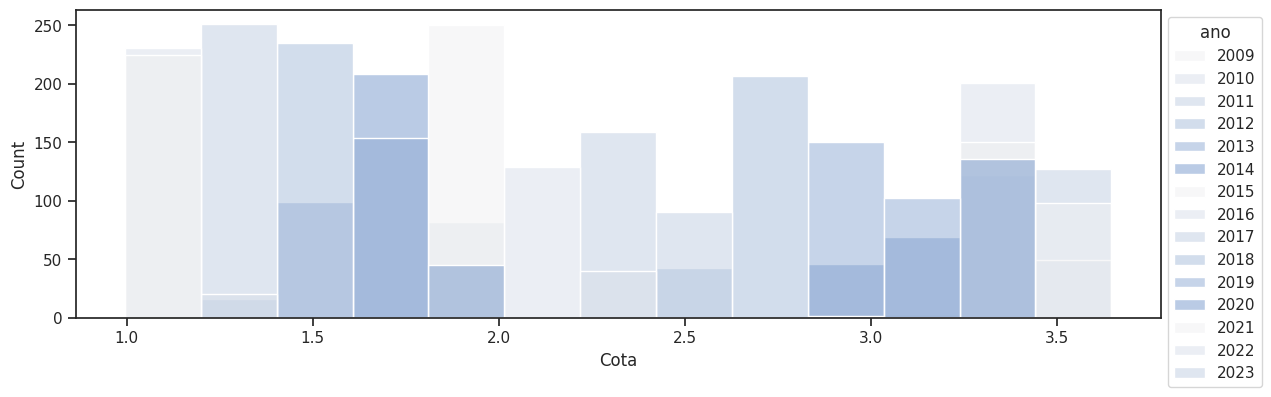

In [270]:
fig, ax = plt.subplots(figsize=(14, 4))
ax = sns.histplot(df, x="Cota", hue="ano",palette = sns.light_palette("#79C"))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

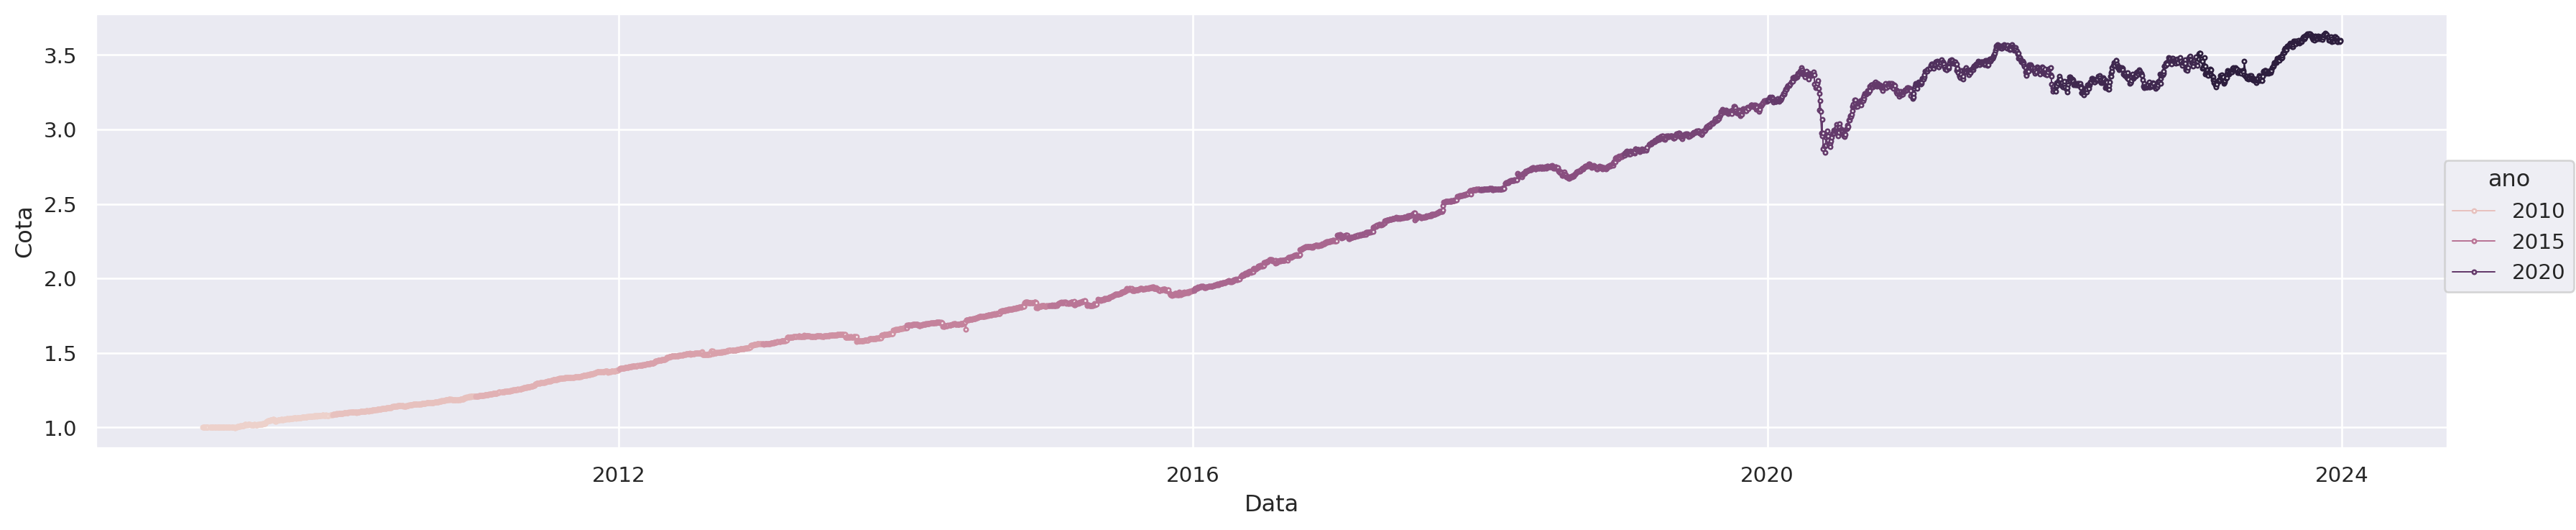

In [271]:

# Criar um gráfico de dispersão
p = so.Plot( df, "Data", "Cota", color="ano").layout(size=(18, 4))
#extent=[0, 0, .8, 1]).show() layout(size=(18, 4))
# Adicionar uma linha conectando os pontos (Path)
p.add(so.Path(marker="o", pointsize=2, linewidth=.75, fillcolor="w"))


In [272]:
#import seaborn.objects as so
##import matplotlib.pyplot as plt

# Criar um gráfico de dispersão
#p = so.Plot(df, "Data", "Cota", color="ano")

# Configurar a escala de exibição
#so.Plot.config.display["scaling"] = 0.7

# Adicionar uma linha conectando os pontos (Path)
#p.add(so.Path(marker="o", pointsize=2, linewidth=.75, fillcolor="w"))

# Mostrar o gráfico
#plt.show()


